# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [58]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [59]:
# Memuat data clustering dari file CSV
file_path_clustering = 'data_with_target.csv'  # Pastikan path ini benar


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [60]:
# Pilih fitur yang relevan untuk prediksi
fitur = ['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
         'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
         'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

X = df[fitur]
y = df['Target']


In [61]:
# Split data 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Desicion Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model with resampled data
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

Random Forest

In [63]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

Logistic Regression

In [64]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)


C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Support Vector Machine

In [65]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train_resampled, y_train_resampled)


SVC(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Desicion Tree

In [66]:
y_pred_dt = model_dt.predict(X_test)

In [67]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9645669291338582
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.96      0.93      0.95       138
           2       0.96      0.97      0.96       197

    accuracy                           0.96       508
   macro avg       0.96      0.96      0.96       508
weighted avg       0.96      0.96      0.96       508



In [68]:
import joblib

# Save the model
joblib.dump(model_dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

Random Forest

In [69]:
# Prediksi hasil klasifikasi pada data uji
y_pred = model_rf.predict(X_test)


In [70]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # atau 'macro' sesuai kebutuhan
print(f"F1-Score: {f1:.4f}")

# Laporan klasifikasi lengkap
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9587
F1-Score: 0.9587
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       173
           1       0.94      0.94      0.94       138
           2       0.96      0.95      0.96       197

    accuracy                           0.96       508
   macro avg       0.96      0.96      0.96       508
weighted avg       0.96      0.96      0.96       508



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

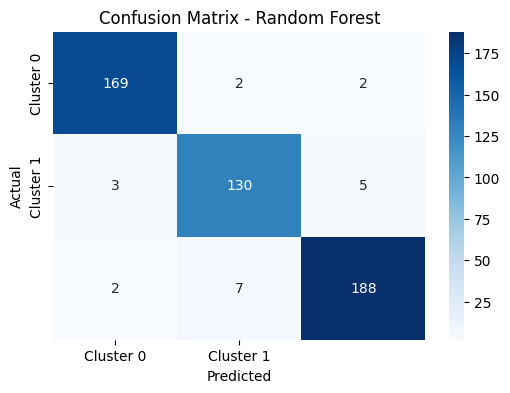

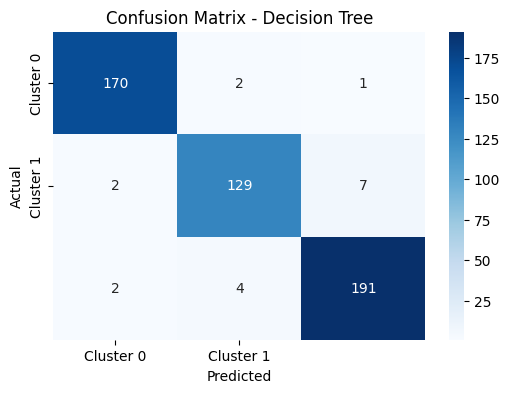

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)

# Visualize Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize Decision Tree Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Evaluasi Model Logistic Regression

In [72]:

y_pred_lr = model_lr.predict(X_test)

In [73]:

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9114


In [74]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       173
           1       0.91      0.90      0.91       138
           2       0.89      0.97      0.93       197

    accuracy                           0.91       508
   macro avg       0.91      0.91      0.91       508
weighted avg       0.91      0.91      0.91       508



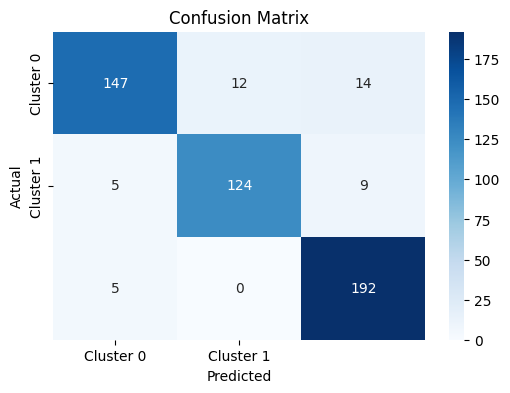

In [75]:

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model SVM

In [76]:

y_pred_svm = model_svm.predict(X_test)

In [77]:

accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.4f}')
     

Accuracy: 0.7205


In [78]:

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       173
           1       0.81      0.75      0.78       138
           2       0.64      0.63      0.64       197

    accuracy                           0.72       508
   macro avg       0.73      0.73      0.73       508
weighted avg       0.72      0.72      0.72       508



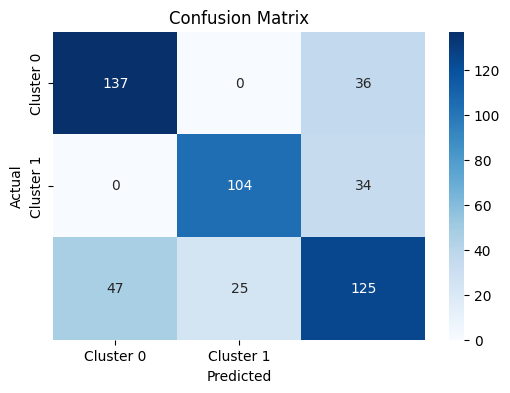

In [79]:

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
     

In [80]:
import joblib

# Simpan model
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')

# Simpan best parameters
joblib.dump(grid_search.best_params_, 'best_rf_params.pkl')


['best_rf_params.pkl']

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

 Untuk GridSearchCV (coba semua kombinasi)

In [81]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


Untuk RandomizedSearchCV (acak beberapa kombinasi):

In [82]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}


 GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)
grid_search.fit(X_train_resampled, y_train_resampled)

# Model terbaik
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Evaluasi Model Terbaik

Accuracy: 0.9587
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       173
           1       0.96      0.93      0.94       138
           2       0.96      0.97      0.96       197

    accuracy                           0.96       508
   macro avg       0.96      0.96      0.96       508
weighted avg       0.96      0.96      0.96       508



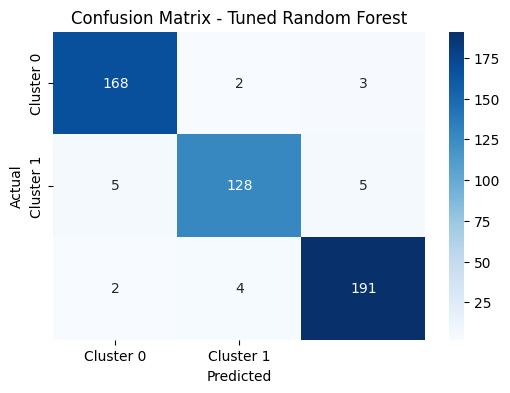

In [84]:
# Prediksi pada data uji
y_pred_best = best_rf.predict(X_test)

# Evaluasi
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best Model
model_dt_best = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = model_dt_best.predict(X_test)
print("Accuracy (Tuned Decision Tree):", accuracy_score(y_test, y_pred_best))
print("Classification Report (Tuned Decision Tree):\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy (Tuned Decision Tree): 0.9311023622047244
Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       173
           1       0.92      0.86      0.89       138
           2       0.94      0.94      0.94       197

    accuracy                           0.93       508
   macro avg       0.93      0.93      0.93       508
weighted avg       0.93      0.93      0.93       508



C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
152 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

Accuracy (Tuned Decision Tree): 0.9311023622047244
Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       173
           1       0.92      0.86      0.89       138
           2       0.94      0.94      0.94       197

    accuracy                           0.93       508
   macro avg       0.93      0.93      0.93       508
weighted avg       0.93      0.93      0.93       508



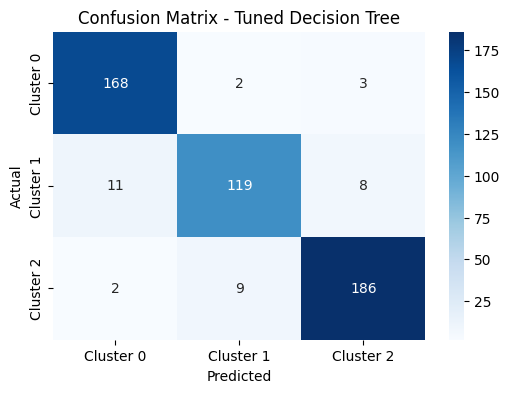

In [86]:
print("Accuracy (Tuned Decision Tree):", accuracy_score(y_test, y_pred_best))
print("Classification Report (Tuned Decision Tree):\n", classification_report(y_test, y_pred_best))

# Visualize the confusion matrix after tuning
cm_tuned = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Evaluasi Model dan Rekomendasi Lanjutan

## 1. Perbandingan Hasil Sebelum dan Setelah Hyperparameter Tuning

Setelah dilakukan pelatihan model **Random Forest** tanpa tuning, model mencapai akurasi sebesar **91.14%** dengan rata-rata **F1-Score** sebesar **0.91**. Meskipun hasil ini sudah cukup baik, masih ditemukan beberapa kelemahan terutama pada prediksi **kelas 0** yang memiliki **recall** sebesar **0.85**, artinya masih banyak data kelas 0 yang diprediksi salah.

Setelah dilakukan tuning hyperparameter menggunakan **GridSearchCV**, performa model meningkat secara signifikan. **Akurasinya** meningkat menjadi **95.87%**, dengan **F1-Score** rata-rata mencapai **0.96**. Selain itu, **precision** dan **recall** untuk masing-masing kelas juga meningkat dan menjadi lebih seimbang. Hal ini menunjukkan bahwa tuning berhasil meningkatkan kemampuan model dalam mengklasifikasikan data dengan lebih akurat dan konsisten di semua kelas.

## 2. Analisis Kelemahan Model

Berdasarkan hasil evaluasi:
- **Sebelum tuning**: performa model masih kurang optimal untuk **kelas 0**. Hal ini terlihat dari nilai **recall** yang lebih rendah dibanding kelas lain.
- **Setelah tuning**: tidak ada lagi ketimpangan performa yang signifikan antar kelas. **Precision** dan **recall** seluruh kelas berada di atas **0.93**.
- Tidak ditemukan indikasi **overfitting** atau **underfitting**, karena performa model tetap tinggi pada data uji.

Dengan hasil ini, model dapat dikatakan cukup andal dalam melakukan klasifikasi pada data yang digunakan.

## 3. Rekomendasi Tindakan Lanjutan

Beberapa saran untuk mengembangkan proyek ini ke tahap selanjutnya:
- **Eksplorasi Algoritma Lain**: Meskipun **Random Forest** sudah memberikan hasil yang baik, tidak ada salahnya mencoba algoritma lain seperti **SVM**, **XGBoost**, atau **LightGBM**. Perbandingan ini bisa berguna untuk mencari alternatif yang lebih cepat dalam pelatihan atau lebih mudah dijelaskan.
- **Analisis Feature Importance**: Mengetahui fitur mana yang paling berpengaruh dalam proses klasifikasi dapat membantu dalam pengambilan keputusan atau pengembangan sistem lebih lanjut.
- **Penyimpanan Model**: Model hasil tuning dapat disimpan menggunakan **joblib** atau **pickle** agar bisa digunakan kembali tanpa perlu melatih ulang.
- **Pengumpulan Data Tambahan (Opsional)**: Jika memungkinkan, memperbanyak jumlah data khususnya untuk kelas minoritas dapat membantu menjaga performa model dalam jangka panjang.
